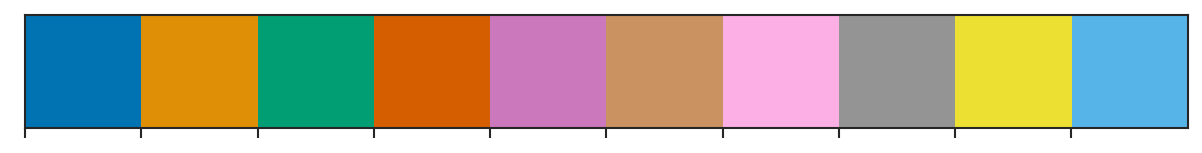

In [37]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 150

import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

cpal = sns.color_palette("colorblind",10)
sns.palplot(sns.color_palette("colorblind"))
sns.set_palette("colorblind")

import pandas as pd
from astropy.io import ascii

import numpy as np
import astropy.constants as c

from astropy.table import Table

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["figure.dpi"] = 150

# Young planet table (TJD, edited 8/24/2022)

In [38]:
yng = pd.read_csv('../data/youngplanets.csv')
yng.head(70)


yng['logage'] = np.zeros(len(yng))
yng['logage_errlo'] = np.zeros(len(yng))
yng['logage_errhi'] = np.zeros(len(yng))

for i in range(len(yng)):
    yng['logage'][i] = np.log10(yng['pl_age'][i]*1.0e9)
    yng['logage_errlo'][i] = np.log10(yng['pl_age'][i]*1.0e9)-np.log10((yng['pl_age'][i]-yng['pl_age_errlo'][i])*1.0e9)
    yng['logage_errhi'][i] = np.log10((yng['pl_age'][i]+yng['pl_age_errhi'][i])*1.0e9) - np.log10(yng['pl_age'][i]*1.0e9)
    

yng['logrp'] = np.zeros(len(yng))
yng['logrp_err'] = np.zeros(len(yng))
    
for i in range(len(yng)):
    _rp = yng['pl_rade'][i]
    _errlo = yng['pl_rade_errlo'][i]
    _errhi = yng['pl_rade_errhi'][i]
    
    _rpmc = np.random.normal(_rp, np.max([_errlo, _errhi]), 10000)
    
    yng['logrp'][i] = np.median(np.log10(_rpmc))
    yng['logrp_err'][i] = np.std(np.log10(_rpmc))

/var/folders/q3/qrdpn9t13rq5m_6ndvm7n5580001hf/T/ipykernel_24902/1000763923.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yng['logage'][i] = np.log10(yng['pl_age'][i]*1.0e9)
/var/folders/q3/qrdpn9t13rq5m_6ndvm7n5580001hf/T/ipykernel_24902/1000763923.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yng['logage_errlo'][i] = np.log10(yng['pl_age'][i]*1.0e9)-np.log10((yng['pl_age'][i]-yng['pl_age_errlo'][i])*1.0e9)
/var/folders/q3/qrdpn9t13rq5m_6ndvm7n5580001hf/T/ipykernel_24902/1000763923.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

# NASA Exoplanet Archive (accessed 7/27/2022)

In [39]:
nea = ascii.read('../data/NEA_2022.07.27.tbl', format='ipac')
nea = nea.to_pandas()
nea.head()

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,...,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,...,NaN,2014-05-14,2008-01,2014-05-14,2,1,2,0,0,0
1,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,1,...,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0
2,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,1,...,NaN,2014-05-14,2008-12,2014-05-14,0,1,1,0,0,0
3,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,1,2,...,NaN,2018-09-04,2017-03,2018-09-06,0,1,4,1,0,0
4,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,1,3,1,...,NaN,2018-09-04,2017-03,2018-09-06,0,1,4,3,0,0


In [15]:

print(np.unique())

pl_name         5063
hostname        5063
pl_letter       5063
hd_name          828
hip_name         901
                ... 
st_nphot        5063
st_nrvc         5063
st_nspec        5063
pl_nespec       5063
pl_ntranspec    5063
Length: 286, dtype: int64

In [31]:
len(nea[arg2])

3907

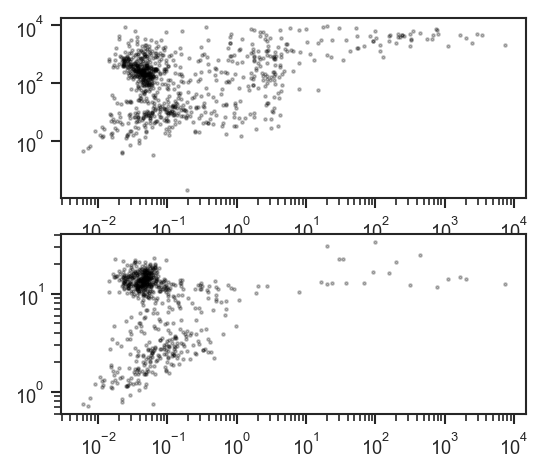

In [36]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(4,3.5))

arg1 = (nea['pl_masselim']==0)
arg2 = (nea['pl_radelim']==0)

sc_kws = {"s":2, "alpha":0.25, "color":"k"}

ax[0].scatter(nea['pl_orbsmax'][arg1],
              nea['pl_masse'][arg1], **sc_kws)

ax[1].scatter(nea['pl_orbsmax'][arg1],
              nea['pl_rade'][arg1], **sc_kws)

for i in range(2):
    ax[i].loglog()

In [4]:
for col in nea.columns:
    print(col)

pl_name
hostname
pl_letter
hd_name
hip_name
tic_id
gaia_id
default_flag
sy_snum
sy_pnum
sy_mnum
cb_flag
discoverymethod
disc_year
disc_refname
disc_pubdate
disc_locale
disc_facility
disc_telescope
disc_instrument
rv_flag
pul_flag
ptv_flag
tran_flag
ast_flag
obm_flag
micro_flag
etv_flag
ima_flag
dkin_flag
soltype
pl_controv_flag
pl_refname
pl_orbper
pl_orbpererr1
pl_orbpererr2
pl_orbperlim
pl_orbsmax
pl_orbsmaxerr1
pl_orbsmaxerr2
pl_orbsmaxlim
pl_rade
pl_radeerr1
pl_radeerr2
pl_radelim
pl_radj
pl_radjerr1
pl_radjerr2
pl_radjlim
pl_masse
pl_masseerr1
pl_masseerr2
pl_masselim
pl_massj
pl_massjerr1
pl_massjerr2
pl_massjlim
pl_msinie
pl_msinieerr1
pl_msinieerr2
pl_msinielim
pl_msinij
pl_msinijerr1
pl_msinijerr2
pl_msinijlim
pl_cmasse
pl_cmasseerr1
pl_cmasseerr2
pl_cmasselim
pl_cmassj
pl_cmassjerr1
pl_cmassjerr2
pl_cmassjlim
pl_bmasse
pl_bmasseerr1
pl_bmasseerr2
pl_bmasselim
pl_bmassj
pl_bmassjerr1
pl_bmassjerr2
pl_bmassjlim
pl_bmassprov
pl_dens
pl_denserr1
pl_denserr2
pl_denslim
pl_orbeccen

In [50]:

print(lolims)

#lolims = np.array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=bool)

[False False False  True False False False False False  True False False
 False False False False False False False False False False False False
 False False False False  True False  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]


/Users/tdavid/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


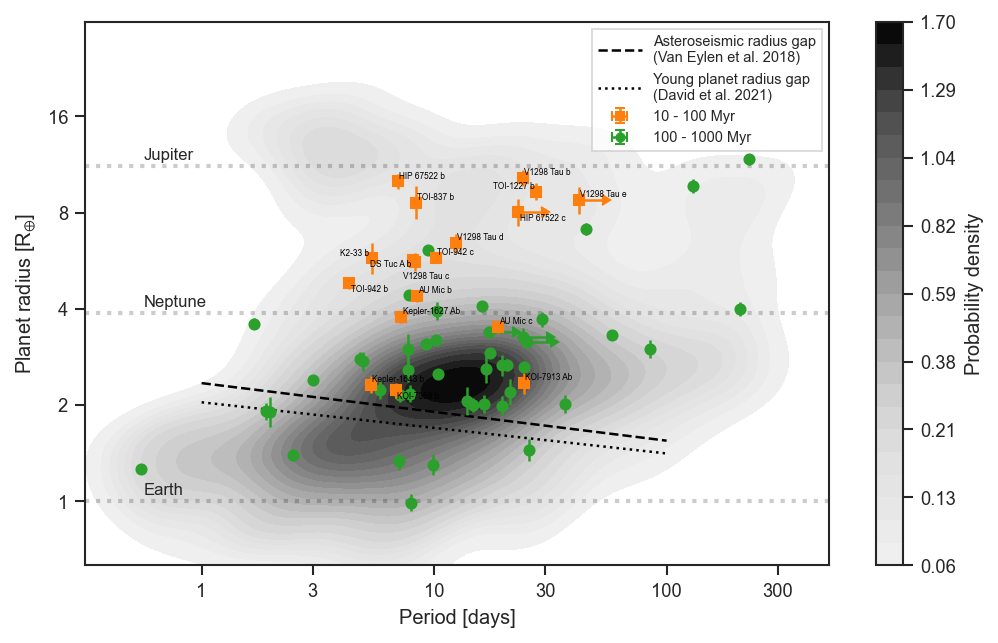

In [57]:
sns.set_style("ticks")
sns.set_palette("tab10")
colors = sns.color_palette("tab10", 10)

from adjustText import adjust_text

arg = (nea.default_flag==1)
arg &= (abs(nea.pl_radeerr1/nea.pl_rade)<0.1)
arg &= (abs(nea.pl_radeerr2/nea.pl_rade)<0.1)
arg &= (nea.pl_controv_flag==0)
arg &= (nea.disc_instrument=='Kepler CCD Array')

##################################
logspace = True

if logspace==True:
    neax = np.log10(nea['pl_orbper'])
    neay = np.log10(nea['pl_rade'])
    
elif logspace==False:
    neax = nea['pl_orbper']
    neay = nea['pl_rade']

#kernel : {‘gau’ | ‘cos’ | ‘biw’ | ‘epa’ | ‘tri’ | ‘triw’ }, optional
cmap = sns.light_palette((0, 0, 0), input="husl", as_cmap=True)
sns.kdeplot(neax[arg], neay[arg], 
            shade=True, 
            cmap=cmap, 
            levels=25, 
            bw_adjust=0.9,
            cbar=True, 
            cbar_kws={'format':'%.2f', 'label': 'Probability density'})


plt.axhline(0.0, color='k', alpha=0.2, ls=':', lw=2, zorder=1) #Earth
plt.axhline(np.log10(3.88266098), color='k', alpha=0.2, ls=':', lw=2, zorder=1) #Neptune
plt.axhline(np.log10(11.2089807), color='k', alpha=0.2, ls=':', lw=2, zorder=1) #Jupiter
plt.text(-0.25, np.log10(11.2089807)+0.02, 'Jupiter', size=8)
plt.text(-0.25, np.log10(3.88266098)+0.02, 'Neptune', size=8)
plt.text(-0.25, np.log10(1.0)+0.02, 'Earth', size=8)


# Van Eylen et al. 2018 valley
xvalley = np.log10(np.linspace(1,100,int(1e3)))
yvalley = -0.09*xvalley+0.37
plt.plot(xvalley, yvalley, color='k', ls='--', label='Asteroseismic radius gap\n(Van Eylen et al. 2018)')


# David et al. 2021 valley
yvalley = -0.08*xvalley+0.31
plt.plot(xvalley, yvalley, color='k', ls=':', label='Young planet radius gap\n(David et al. 2021)')


plt.xlim(-0.5,2.7)
plt.ylim(-0.2,1.5)


plt.xlabel('Period [days]')
plt.ylabel('Planet radius [R$_\mathregular{\oplus}$]')
plt.xticks(np.log10([1,3,10,30,100,300]), ['1','3','10','30','100','300'])
plt.yticks(np.log10([1,2,4,8,16]),['1','2','4','8','16'])


yng_arg = (yng['pl_age']+yng['pl_age_errhi'] < 1.0) & (yng['pl_rade_errlo']/yng['pl_rade']<0.15) &  (yng['pl_rade_errhi']/yng['pl_rade']<0.15)
lt100 = yng_arg & (yng['pl_age']<0.1) 
gt100 = yng_arg & (yng['pl_age']>=0.1)


#Some planets have period lower limits
xlolims = np.array(yng['pl_porb_flag']=='>')
xerr = np.zeros(len(xlolims))
xerr[xlolims] = 1e-1


plt.errorbar(np.log10(yng['pl_porb'][lt100]), 
             yng['logrp'][lt100], 
             yerr=yng['logrp_err'][lt100], 
             xlolims=xlolims[lt100], xerr=xerr[lt100],
             fmt='s', zorder=998, label='10 - 100 Myr')

plt.errorbar(np.log10(yng['pl_porb'][gt100]), 
             yng['logrp'][gt100], 
             yerr=yng['logrp_err'][gt100],
             xlolims=xlolims[gt100], xerr=xerr[gt100],
             fmt='o', label='100 - 1000 Myr')


_xlabel = np.array(np.log10(yng['pl_porb'][lt100]))
_ylabel = np.array(yng['logrp'][lt100])
_label = np.array(yng['planet_name'][lt100])
                
texts = [plt.text(_xlabel[i], 
                  _ylabel[i], 
                  _label[i], 
                  ha='center', 
                  va='center', 
                  color='k',
                  size=4, 
                  zorder=999) 
        for i in range(len(_label))]
adjust_text(texts, lim=10)

plt.legend(frameon=True, markerscale=0.8, ncol=1, prop={'size':7}, handlelength=3, loc='upper right', fancybox=False)

plt.gcf().set_size_inches(0.8*10,0.8*6)
plt.savefig('../figures/pr-kepler.pdf', bbox_inches='tight');

# Planets color-coded by age

/Users/tdavid/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


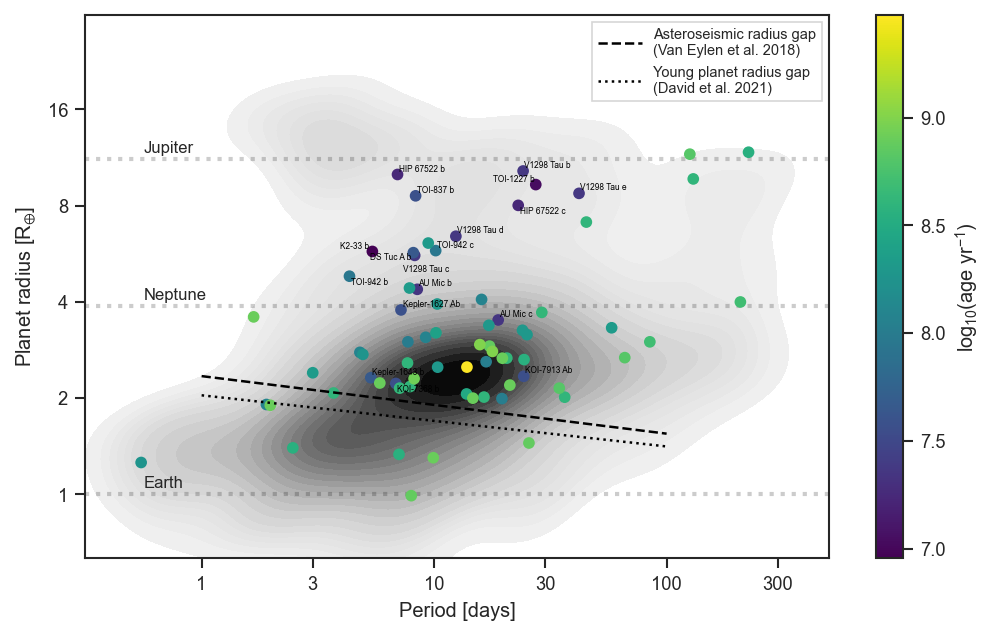

In [69]:
sns.set_style("ticks")
sns.set_palette("tab10")
colors = sns.color_palette("tab10", 10)

from adjustText import adjust_text

arg = (nea.default_flag==1)
arg &= (abs(nea.pl_radeerr1/nea.pl_rade)<0.1)
arg &= (abs(nea.pl_radeerr2/nea.pl_rade)<0.1)
arg &= (nea.pl_controv_flag==0)
arg &= (nea.disc_instrument=='Kepler CCD Array')

##################################
logspace = True

if logspace==True:
    neax = np.log10(nea['pl_orbper'])
    neay = np.log10(nea['pl_rade'])
    
elif logspace==False:
    neax = nea['pl_orbper']
    neay = nea['pl_rade']

#kernel : {‘gau’ | ‘cos’ | ‘biw’ | ‘epa’ | ‘tri’ | ‘triw’ }, optional
cmap = sns.light_palette((0, 0, 0), input="husl", as_cmap=True)
sns.kdeplot(neax[arg], neay[arg], 
            shade=True, 
            cmap=cmap, 
            levels=25, 
            bw_adjust=0.9,
            cbar=False, 
            cbar_kws={'format':'%.2f', 'label': 'Probability density'})


plt.axhline(0.0, color='k', alpha=0.2, ls=':', lw=2, zorder=1) #Earth
plt.axhline(np.log10(3.88266098), color='k', alpha=0.2, ls=':', lw=2, zorder=1) #Neptune
plt.axhline(np.log10(11.2089807), color='k', alpha=0.2, ls=':', lw=2, zorder=1) #Jupiter
plt.text(-0.25, np.log10(11.2089807)+0.02, 'Jupiter', size=8)
plt.text(-0.25, np.log10(3.88266098)+0.02, 'Neptune', size=8)
plt.text(-0.25, np.log10(1.0)+0.02, 'Earth', size=8)


# Van Eylen et al. 2018 valley
xvalley = np.log10(np.linspace(1,100,int(1e3)))
yvalley = -0.09*xvalley+0.37
plt.plot(xvalley, yvalley, color='k', ls='--', label='Asteroseismic radius gap\n(Van Eylen et al. 2018)')


# David et al. 2021 valley
yvalley = -0.08*xvalley+0.31
plt.plot(xvalley, yvalley, color='k', ls=':', label='Young planet radius gap\n(David et al. 2021)')


plt.xlim(-0.5,2.7)
plt.ylim(-0.2,1.5)


plt.xlabel('Period [days]')
plt.ylabel('Planet radius [R$_\mathregular{\oplus}$]')
plt.xticks(np.log10([1,3,10,30,100,300]), ['1','3','10','30','100','300'])
plt.yticks(np.log10([1,2,4,8,16]),['1','2','4','8','16'])


yng_arg = (yng['pl_age']+yng['pl_age_errhi'] < 1.0) & (yng['pl_rade_errlo']/yng['pl_rade']<0.15) &  (yng['pl_rade_errhi']/yng['pl_rade']<0.15)
lt100 = yng_arg & (yng['pl_age']<0.1) 
gt100 = yng_arg & (yng['pl_age']>=0.1)


#Some planets have period lower limits
xlolims = np.array(yng['pl_porb_flag']=='>')
xerr = np.zeros(len(xlolims))
xerr[xlolims] = 1e-1


plt.scatter(np.log10(yng['pl_porb']), 
             yng['logrp'], 
             c=np.log10(yng['pl_age']*1e9), cmap='viridis')

plt.colorbar(label=r'log$_\mathregular{10}$(age yr$^\mathregular{-1}$)')

_xlabel = np.array(np.log10(yng['pl_porb'][lt100]))
_ylabel = np.array(yng['logrp'][lt100])
_label = np.array(yng['planet_name'][lt100])
                
texts = [plt.text(_xlabel[i], 
                  _ylabel[i], 
                  _label[i], 
                  ha='center', 
                  va='center', 
                  color='k',
                  size=4, 
                  zorder=999) 
        for i in range(len(_label))]
adjust_text(texts, lim=10)

plt.legend(frameon=True, markerscale=0.8, ncol=1, prop={'size':7}, handlelength=3, loc='upper right', fancybox=False)

plt.gcf().set_size_inches(0.8*10,0.8*6)
plt.savefig('../figures/pr-kepler-cc.pdf', bbox_inches='tight');

# Stellar mass vs. planet radius

/Users/tdavid/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


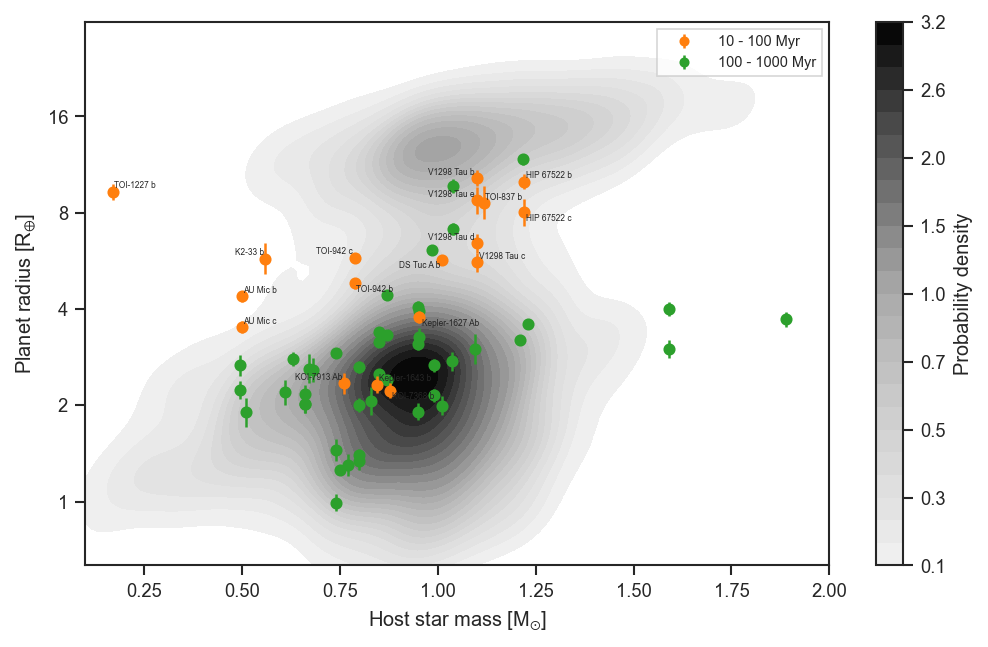

In [58]:
arg = (nea.default_flag==1) &\
      (nea.discoverymethod=='Transit') &\
      (nea.pl_orbper<300)

sns.kdeplot(nea['st_mass'][arg], neay[arg], 
            shade=True, 
            cmap=cmap, 
            levels=25, 
            bw_adjust=0.9,
            cbar=True, 
            cbar_kws={'format':'%.1f', 'label': 'Probability density'})

plt.errorbar(yng['st_mass'][lt100], 
             yng['logrp'][lt100], 
             yerr=yng['logrp_err'][lt100], 
             fmt='o', 
             zorder=998, 
             label='10 - 100 Myr')

plt.errorbar(yng['st_mass'][gt100], 
             yng['logrp'][gt100], 
             yerr=yng['logrp_err'][gt100], 
             fmt='o', 
             label='100 - 1000 Myr')

_xlabel = np.array(yng['st_mass'][lt100])
_ylabel = np.array(yng['logrp'][lt100])
_label = np.array(yng['planet_name'][lt100])                

texts = [plt.text(_xlabel[i], _ylabel[i], _label[i], ha='center', va='center', size=4, zorder=999) 
        for i in range(len(_label))]
adjust_text(texts, lim=10)

plt.xlim(0.1,2)

plt.ylim(-0.2,1.5)

plt.xlabel('Host star mass [M$_\mathregular{\odot}$]')
plt.ylabel('Planet radius [R$_\mathregular{\oplus}$]')
plt.yticks(np.log10([1,2,4,8,16]),['1','2','4','8','16'])

plt.legend(frameon=True, 
           markerscale=0.8, 
           ncol=1, 
           prop={'size':7}, 
           handlelength=3, 
           loc='upper right', 
           fancybox=False)

plt.gcf().set_size_inches(0.8*10,0.8*6)
plt.savefig('../figures/stmass-plradius.pdf', bbox_inches='tight');
plt.show()

/Users/tdavid/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


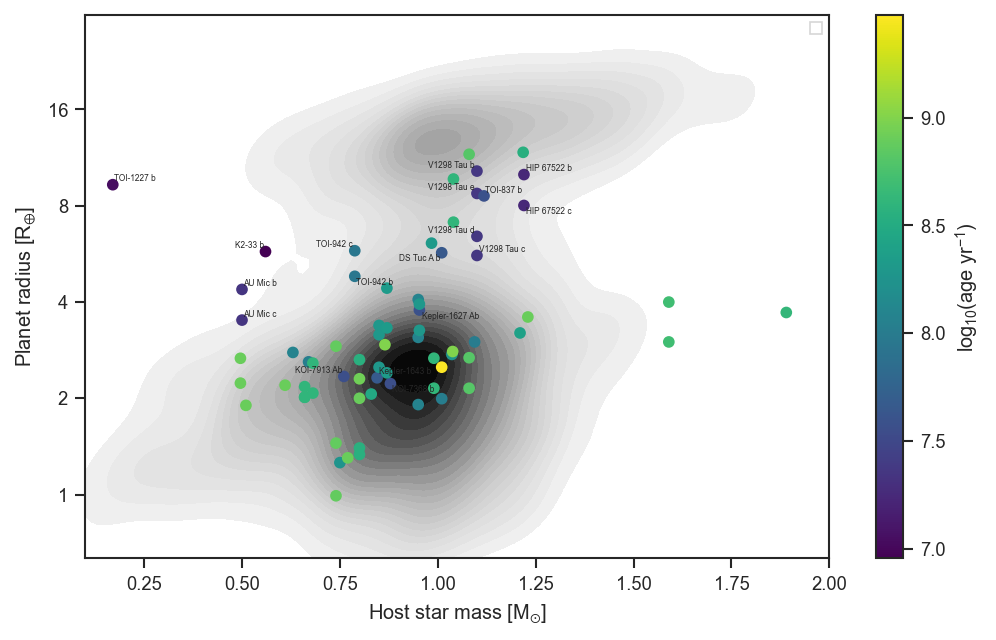

In [68]:
arg = (nea.default_flag==1) &\
      (nea.discoverymethod=='Transit') &\
      (nea.pl_orbper<300)

sns.kdeplot(nea['st_mass'][arg], neay[arg], 
            shade=True, 
            cmap=cmap, 
            levels=25, 
            bw_adjust=0.9,
            cbar=False, 
            cbar_kws={'format':'%.1f', 'label': 'Probability density'})

plt.scatter(yng['st_mass'], 
             yng['logrp'],
            c=np.log10(yng['pl_age']*1e9),
            cmap='viridis')

plt.colorbar(label=r'log$_\mathregular{10}$(age yr$^\mathregular{-1}$)')

_xlabel = np.array(yng['st_mass'][lt100])
_ylabel = np.array(yng['logrp'][lt100])
_label = np.array(yng['planet_name'][lt100])                

texts = [plt.text(_xlabel[i], _ylabel[i], _label[i], ha='center', va='center', size=4, zorder=999) 
        for i in range(len(_label))]
adjust_text(texts, lim=10)

plt.xlim(0.1,2)

plt.ylim(-0.2,1.5)

plt.xlabel('Host star mass [M$_\mathregular{\odot}$]')
plt.ylabel('Planet radius [R$_\mathregular{\oplus}$]')
plt.yticks(np.log10([1,2,4,8,16]),['1','2','4','8','16'])

plt.legend(frameon=True, 
           markerscale=0.8, 
           ncol=1, 
           prop={'size':7}, 
           handlelength=3, 
           loc='upper right', 
           fancybox=False)

plt.gcf().set_size_inches(0.8*10,0.8*6)
plt.savefig('../figures/stmass-plradius-cc.pdf', bbox_inches='tight');
plt.show()

# Select well-characterized planets from the Exoplanet Archive

In [3]:
mearth = c.M_earth.cgs.value
rearth = c.R_earth.cgs.value

mthresh = 0.2
rthresh = 0.2

nea['rho_gcc'] = nea['pl_masse']*mearth / (4./3.*np.pi*(nea['pl_rade']*rearth)**3.)

nsamples = 1000
_mp = np.array([np.random.normal(nea['pl_masse'], np.nanmax([nea['pl_masseerr2'], nea['pl_masseerr1']], axis=0)) for n in range(nsamples)])
_rp = np.array([np.random.normal(nea['pl_rade'], np.nanmax([nea['pl_radeerr2'], nea['pl_radeerr1']], axis=0)) for n in range(nsamples)])
_rho = (_mp*mearth)/(4./3.*np.pi*(_rp*rearth)**3.)

nea['rho_gcc'] = np.nanmean(_rho, axis=0)
nea['rho_gcc_err'] = np.nanstd(_rho, axis=0)

nea_m = (nea['default_flag']==1) &\
        (nea['pl_masseerr1']/nea['pl_masse']<mthresh) &\
        (nea['pl_masseerr2']/nea['pl_masse']<mthresh) &\
        (nea['pl_radeerr1']/nea['pl_rade']<rthresh) &\
        (nea['pl_radeerr2']/nea['pl_rade']<rthresh) &\
        (abs(nea['pl_radelim'])!=1) &\
        (abs(nea['pl_masselim'])!=1) &\
        (np.isfinite(nea['rho_gcc'])) &\
        (nea['pl_orbper']<150.) &\
        (nea['st_teff']>4500) &\
        (nea['st_teff']<6500)
        #(nea['discoverymethod']=='Transit') &\

k51 = nea['hostname']=='Kepler-51'

/var/folders/q3/qrdpn9t13rq5m_6ndvm7n5580001hf/T/ipykernel_69075/1671814180.py:12: RuntimeWarning: divide by zero encountered in true_divide
  _rho = (_mp*mearth)/(4./3.*np.pi*(_rp*rearth)**3.)
/var/folders/q3/qrdpn9t13rq5m_6ndvm7n5580001hf/T/ipykernel_69075/1671814180.py:12: RuntimeWarning: invalid value encountered in true_divide
  _rho = (_mp*mearth)/(4./3.*np.pi*(_rp*rearth)**3.)
/Users/tdavid/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/q3/qrdpn9t13rq5m_6ndvm7n5580001hf/T/ipykernel_69075/1671814180.py:14: RuntimeWarning: Mean of empty slice
  nea['rho_gcc'] = np.nanmean(_rho, axis=0)
/Users/tdavid/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/Users/tdavid/opt/anaconda3/lib/python3.8/site-packages/nump